<a href="https://colab.research.google.com/github/lorens247/FTS/blob/main/Population_Forecasting_Using_Fuzzy_Logic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install pyFTS library and import common dependecies
---
Fuzzy Time Series (FTS) are non parametric methods for time series forecasting based on Fuzzy Theory. Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy.Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy.



In [1]:
!pip3 install pyFTS
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pylab as plt
import numpy as np
from scipy.integrate import odeint
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Define the prediction model - odeint
---
The odeint (ordinary differential equation integration) library is a collection of advanced numerical algorithms to solve initial-value problems of ordinary differential equations.
*   model: Function name that returns derivative values at requested y and t values as dydt = model(y,t)
*   y0: Initial conditions of the differential states
*   t: Time points at which the solution should be reported. Additional internal points are often calculated to maintain accuracy of the solution but are not reported. 





In [2]:
# k = percentage change in rate of birth - rate of death
k= 0.005

In [3]:
# Define the model
# y = Population, t = time in years, e = exponential constant (2.718)

def model(y, t):
    k=0.005
    dydt = k*y
    return dydt

In [4]:
# Array creation routines based on numerical ranges with 10 years interval
t = np.arange(0,10,1)

In [5]:
# Set initial population y0
y0 = 3233366.00

In [6]:
# Ordinary Differential Equation Integration
y = odeint(model,y0,t)

In [7]:
print(t)

[0 1 2 3 4 5 6 7 8 9]


In [8]:
# Prediction for 10 years
print(y)

[[3233366.        ]
 [3249573.33444558]
 [3265861.90777066]
 [3282232.1090571 ]
 [3298684.31979675]
 [3315219.01897381]
 [3331836.62458363]
 [3348537.527103  ]
 [3365322.14200797]
 [3382190.89131213]]


The population after 10 years is: [3382190.89131213]


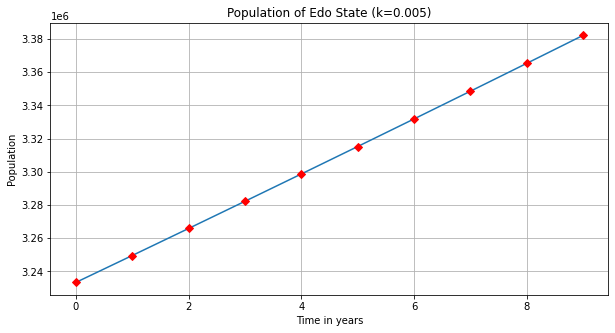

In [9]:
for i in t:
     if i==9:
            k=int(i)
            print('The population after '+ str(i+1) + ' years is: ' + str(y[k]))

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[10,5])
plt.plot(t,y)
plt.plot(t,y,'rD')        
plt.xlabel('Time in years')    
plt.ylabel('Population')    
plt.title('Population of Edo State (k=0.005)')
plt.grid()
plt.show()

Universe of Discourse Partitioner 
---
Fuzzy Sets
*   VLPG = Very Low Population Growth (A0) 
*   LPG = Low Population Growth (A1)
*   MPG = Moderate Population Growth (A2)
*   NPG = Normal Population Growth (A3)
*   HPG = High Population Growth (A4) 
*   VHPG = Very High Population Growth (A5) 

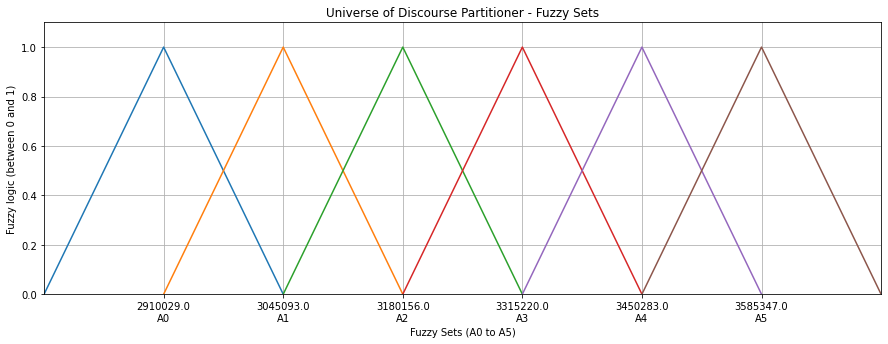

In [10]:
# fuzzy set - A0 to A5
from pyFTS.partitioners import Grid
fs = Grid.GridPartitioner(data=y,npart=6)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,5])
fs.plot(ax)
plt.title('Universe of Discourse Partitioner - Fuzzy Sets')
plt.xlabel('Fuzzy Sets (A0 to A5)')    
plt.ylabel('Fuzzy logic (between 0 and 1)')
plt.grid()

Data Fuzzyfication 
---
Each data point of the numerical time series Y(t) will be translated to a fuzzy representation (usually one or more fuzzy sets), and then a fuzzy time series F(t) is created.



In [11]:
# Fuzzyfication
fuzzyfied = fs.fuzzyfy(y, method='maximum', mode='sets')
fuzzyfied

[['A2'],
 ['A3'],
 ['A3'],
 ['A3'],
 ['A3'],
 ['A3'],
 ['A3'],
 ['A3'],
 ['A3'],
 ['A3']]

In [12]:
# Rules generation
from pyFTS.models import chen
model = chen.ConventionalFTS(partitioner=fs)
model.fit(y)
print(model)

Conventional FTS:
A2 -> A3
A3 -> A3



Fuzzy Membership of prediction based on Rule   
---
Fuzzy membership is moderate and normal population Growth
*   A2 - Moderate Population Growth
*   A3 - Normal Population Growth 





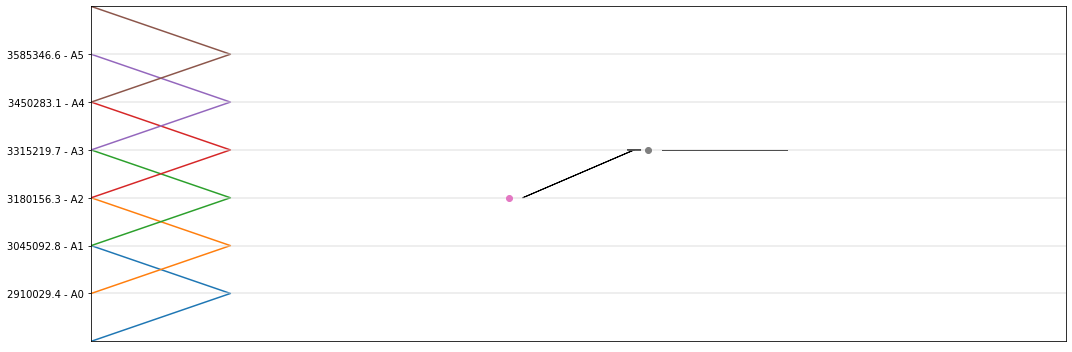

In [13]:
# Plot rules
from pyFTS.common import Util
Util.plot_rules(model, size=[15,5] , rules_by_axis=6)
    
 